<a href="https://colab.research.google.com/github/Dhamia96/Pandas_Series/blob/main/Copy_of_stc_TV_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STC Jawwy

In [1]:
"""
Here we install libraries that are not installed by default
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb

In [2]:
# Import the required libraries
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset consists of details about each customer and the movies and/or tv shows watched in addition to the genre.

You are required to work on task three to build a recommendation engine for our platform to Recommend movies to usesrs that they might be interested in¶


In [3]:
dataframe = pd.read_excel("/content/stc TV Data Set_T3.xlsb",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [4]:
# check the data shape
dataframe.shape

(1048575, 5)

In [5]:
# display the first 5 rows
dataframe.head()

,user_id_maped,program_name,rating,date_,program_genre
0,26138,100 treets,1,2017-05-27,Drama
1,7946,Moana,1,2017-05-21,Animation
2,7418,The Mermaid Princess,1,2017-08-10,Animation
3,19307,The Mermaid Princess,2,2017-07-26,Animation
4,15860,Churchill,2,2017-07-07,Biography


In [6]:
# describe the numeric values in the dataset
dataframe.describe()

,user_id_maped,rating
count,1.048575e+06,1.048575e+06
mean,1.709266e+04,2.497283e+00
std,1.003513e+04,1.119837e+00
min,1.000000e+00,1.000000e+00
25%,8.253000e+03,1.000000e+00
50%,1.714900e+04,2.000000e+00
75%,2.566500e+04,3.000000e+00
max,3.428000e+04,4.000000e+00


In [7]:
# check if any column has null value in the dataset
dataframe.isnull().any()

user_id_maped    False
program_name     False
rating           False
date_            False
program_genre    False
dtype: bool

In [8]:

print(f'''-Number of users:{dataframe['user_id_maped'].nunique()}
-Number of programs:{dataframe['program_name'].nunique()}
-Number of genres: {dataframe['program_genre'].nunique()}''')

-Number of users:11578
-Number of programs:8013
-Number of genres: 16


In [9]:
# we import Visualization libraries
# you can ignore and use any other graphing libraries
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [10]:
#counting and calculating the average rating for each user
users_ratings = (
    dataframe
    .groupby('user_id_maped', as_index=False)
    .agg({'rating': ['count', 'mean']})
)
users_ratings.columns=['user_id_maped', 'nu_rating', 'avg_rating']
users_ratings['avg_rating']=users_ratings['avg_rating'].round(2)
users_ratings = users_ratings.sort_values(by=['nu_rating'], ascending=False).reset_index(drop=True)

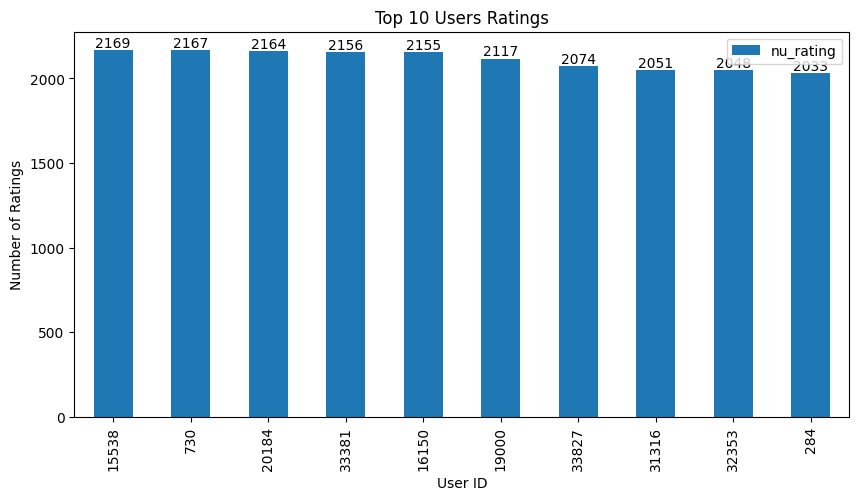

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
users_ratings.head(10).plot(x='user_id_maped', y='nu_rating', kind='bar', ax=ax)

# Add labels and title
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Users Ratings')

# Annotate the bars with the corresponding values
for i, value in enumerate(users_ratings.head(10)['nu_rating']):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Display the plot
plt.show()

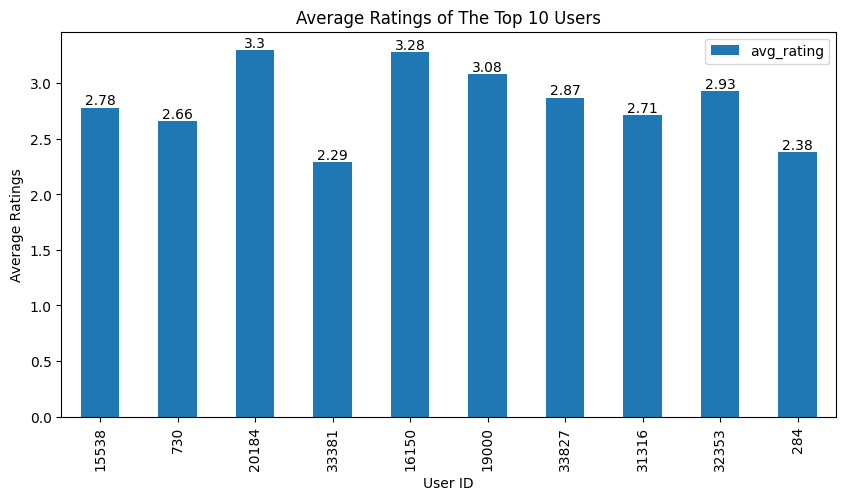

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
users_ratings.head(10).plot(x='user_id_maped', y='avg_rating', kind='bar', ax=ax)

# Add labels and title
plt.xlabel('User ID')
plt.ylabel('Average Ratings')
plt.title('Average Ratings of The Top 10 Users')

# Annotate the bars with the corresponding values
for i, value in enumerate(users_ratings.head(10)['avg_rating']):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Display the plot
plt.show()

In [13]:
# Count the most frequent program genre that has been watched for every user.
grouped_df = dataframe.groupby(['user_id_maped', 'program_genre']).size().reset_index(name='count')

#convert 'count' to numeric type
grouped_df['count'] = pd.to_numeric(grouped_df['count'])
# Find the most frequent genre for each user_id
most_frequent_genre = grouped_df.groupby('user_id_maped')['count'].idxmax()
most_frequent_genre = grouped_df.loc[most_frequent_genre]
most_frequent_genre= most_frequent_genre.rename(columns={'program_genre': 'most_frequent_genre'})
most_frequent_genre= most_frequent_genre.rename(columns={'count': 'count_most_frequent_genre'})

most_frequent_genre = most_frequent_genre.sort_values(by=['count_most_frequent_genre'], ascending=False).reset_index(drop=True)

most_frequent_genre.head(10)

,user_id_maped,most_frequent_genre,count_most_frequent_genre
0,20184,Animation,2073
1,730,Animation,2052
2,15538,Animation,2018
3,33381,Animation,1947
4,7931,Comedy,1875
5,16491,Animation,1858
6,17385,Animation,1840
7,10072,Comedy,1838
8,3588,Animation,1825
9,17610,Animation,1760


In [14]:
#Calculating the average rating for each program
program_ratings= (
 dataframe
 .groupby(['program_name'], as_index=False)
 .agg({'rating': ['mean']})
 )

program_ratings.columns=['program_name', 'avg_rating']
program_ratings['avg_rating']=program_ratings['avg_rating'].round(2)
program_ratings = program_ratings.sort_values(by=['avg_rating'], ascending=False).reset_index(drop=True)

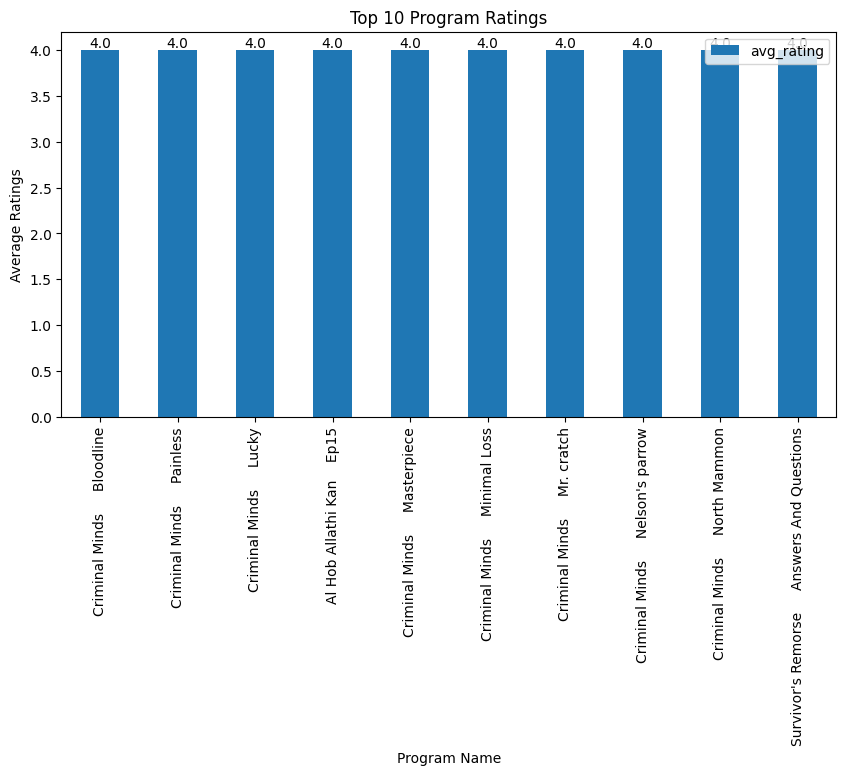

In [15]:

fig, ax = plt.subplots(figsize=(10, 5))
program_ratings.head(10).plot(x='program_name', y='avg_rating', kind='bar', ax=ax)

# Add labels and title
plt.xlabel('Program Name')
plt.ylabel('Average Ratings')
plt.title('Top 10 Program Ratings')

# Annotate the bars with the corresponding values
for i, value in enumerate(program_ratings.head(10)['avg_rating']):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Display the plot
plt.show()

In [16]:
"""
TODO build your Recommender system to Highlight Programs that usesrs might be interested in
"""

'\nTODO build your Recommender system to Highlight Programs that usesrs might be interested in\n'

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
# User-based Collaborative Filtering
user_similarities = cosine_similarity(dataframe.pivot_table(index='user_id_maped', columns='program_name', values='rating', fill_value=0))


In [18]:
# Calculate user similarities based on ratings
def user_based_recommendation(user_id, num_recommendations):
    user_ratings = dataframe[dataframe['user_id_maped'] == user_id]
    similar_users = user_similarities[user_id].argsort()[::-1][1:]  # Exclude the user itself
    recommendations = []
    for similar_user in similar_users:
        similar_user_ratings = dataframe[dataframe['user_id_maped'] == similar_user]
        new_programs = similar_user_ratings[~similar_user_ratings['program_name'].isin(user_ratings['program_name'])]
        recommendations.extend(new_programs['program_name'].unique())
        if len(recommendations) > num_recommendations:
          return recommendations[:num_recommendations]

    return recommendations
#user_based_recommendation(730,5)

In [19]:
# we should convert the 'program_name' column to a numeric value before passing it to osine_similarity()
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to 'program_name' column
dataframe['program_name_encoded'] = label_encoder.fit_transform(dataframe['program_name'])

# Item-based Collaborative Filtering
item_similarities = cosine_similarity(dataframe.pivot_table(index='program_name_encoded', columns='user_id_maped', values='rating', fill_value=0))

In [20]:
# Calculate item similarities based on ratings
def item_based_recommendation(user_id, num_recommendations):
    user_ratings = dataframe[dataframe['user_id_maped'] == user_id]
    recommendations = []
    for program in user_ratings['program_name_encoded']:
        similar_programs = item_similarities[program].argsort()[::-1][1:]  # Exclude the program itself
        for similar_program_encoded in similar_programs:
            if similar_program_encoded not in user_ratings['program_name_encoded'].values:
                similar_program = label_encoder.inverse_transform([similar_program_encoded])[0]
                recommendations.append(similar_program)
                if len(recommendations) > num_recommendations:
                    return recommendations[:num_recommendations]
        return recommendations
#item_based_recommendation(730,5)

In [21]:
#build a recommendator based on the most frequent genre that has been watched by the user and the avg raing of the program
def content_based_recommendation(user_id, num_recommendations):
    user_most_frequent_genre = most_frequent_genre[most_frequent_genre['user_id_maped'] == user_id]['most_frequent_genre'].iloc[0]
    similar_programs = dataframe[dataframe['program_genre'] == user_most_frequent_genre]['program_name'].unique()
    recommendations = []
    for program in similar_programs:
        if not dataframe[(dataframe['user_id_maped'] == user_id) & (dataframe['program_name'] == program)].empty:
            continue
        avg_rating = program_ratings[program_ratings['program_name'] == program]['avg_rating'].iloc[0]
        recommendations.append([program, avg_rating])
    # Sort the list based on program ratings
    recommendations.sort(key=lambda x: x[1], reverse=True)
    recommendations = [program for program, _ in recommendations]  # Extract program names
    if len(recommendations) > num_recommendations:
        return recommendations[:num_recommendations]
    return recommendations
#content_based_recommendation(1, 5)

In [22]:
# Example usage
user_id = 730
num_recommendations = 5

user_based_recs = user_based_recommendation(user_id, num_recommendations)
item_based_recs = item_based_recommendation(user_id, num_recommendations)
content_based_recs = content_based_recommendation(user_id, num_recommendations)

print("User-based recommendations:", user_based_recs)
print("Item-based recommendations:", item_based_recs)
print("Content-based recommendations:", content_based_recs)

User-based recommendations: ['Guardians Of The Tomb', 'Independence Day: Resurgence', 'Why Him', 'The Haunting', 'Unforgettable']
Item-based recommendations: ['Teenage Mutant Ninja Turtles  New Friend  Old Enemy', 'Teenage Mutant Ninja Turtles  Metalhead', 'My Little Pony: Friendship Is Magic     Princess pike', 'SpongeBob quarePants  Yours  Mine And Mine / Kracked Krabs', "SpongeBob quarePants  Gramma's ecret Recipe / The Cent Of Money"]
Content-based recommendations: ["Pinky Dinky Doo      Try It  You'll Like It…Pretty Much", "King Arthur's Disasters   The urprise Quest", "King Arthur's Disasters   The Ice Palace", 'Driver Dan’s tory Train    Ep33', "King Arthur's Disasters   The Parchment of Arusella"]


In [23]:
"""
TODO show the recommendations (top 5) for the people who watched "Moana" movie
"""

'\nTODO show the recommendations (top 5) for the people who watched "Moana" movie\n'

In [24]:
def generate_recommendations(program_name, num_recommendations):
    # Get the users who watched the given program
    watched_users = dataframe[dataframe['program_name'] == program_name]['user_id_maped'].unique()

    # Filter the dataframe to include programs watched by those users, excluding the given program
    filtered_data = dataframe[dataframe['user_id_maped'].isin(watched_users) & (dataframe['program_name'] != program_name)]

    # Group by program and get the average rating from the program_ratings DataFrame
    program_ratings_filtered = program_ratings[program_ratings['program_name'].isin(filtered_data['program_name'].unique())]

    # Sort the programs based on average rating in descending order
    sorted_programs = program_ratings_filtered.sort_values('avg_rating', ascending=False)

    # Get the top recommended programs
    recommendations = sorted_programs.head(num_recommendations)['program_name'].tolist()

    return recommendations

In [25]:
#Example usage

program_name='Moana'
num_recommendations= 5
print(f"Top 5 recommendations for the people who watched {program_name} movie")
generate_recommendations(program_name, num_recommendations)

Top 5 recommendations for the people who watched Moana movie


['Al Hob Allathi Kan    Ep15',
 'Breaking Bad      Fly',
 'Banat Adam    Ep26',
 'Banat Adam    Ep29',
 'Banat Adam    Ep31']